In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes):
    path = os.path.join(cur_path,'Dataset','train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
train_data=pd.read_csv("C:\\Users\\hmitt\\OneDrive\\Documents\\MSIS\\Sem_2_Spring_2023\\Projects\\Traffic-Sign-Recognition\\Dataset\\Train.csv" ,usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv("C:\\Users\\hmitt\\OneDrive\\Documents\\MSIS\\Sem_2_Spring_2023\\Projects\\Traffic-Sign-Recognition\\Dataset\\Test.csv", usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label'},inplace=True,axis=1)
test_data.rename({'ClassId':'label'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,Path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [7]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [20]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 54s 106ms/step - loss: 2.3506 - accuracy: 0.3984 - val_loss: 0.8850 - val_accuracy: 0.8015
Epoch 2/20
491/491 [==============================] - 49s 100ms/step - loss: 1.0692 - accuracy: 0.6836 - val_loss: 0.5905 - val_accuracy: 0.8326
Epoch 3/20
491/491 [==============================] - 72s 148ms/step - loss: 0.8264 - accuracy: 0.7506 - val_loss: 0.3210 - val_accuracy: 0.9153
Epoch 4/20
491/491 [==============================] - 50s 102ms/step - loss: 0.7099 - accuracy: 0.7869 - val_loss: 0.2492 - val_accuracy: 0.9327
Epoch 5/20
491/491 [==============================] - 48s 99ms/step - loss: 0.6304 - accuracy: 0.8078 - val_loss: 0.2046 - val_accuracy: 0.9382
Epoch 6/20
491/491 [==============================] - 50s 101ms/step - loss: 0.5867 - accuracy: 0.8220 - val_loss: 0.1705 - val_accuracy: 0.9546
Epoch 7/20
491/491 [==============================] - 52s 105ms/step - loss: 0.5506 - accuracy: 0.8347 - val_loss: 0.1701 - val_acc

C:\Users\hmitt\anaconda3\envs\cnn\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


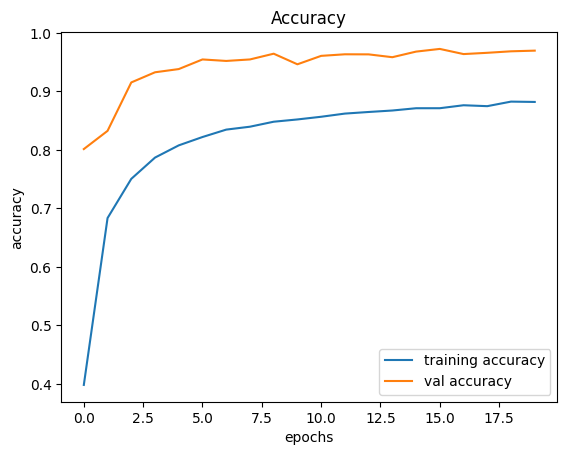

In [22]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 6s 25ms/step


In [24]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9696505993369039

In [25]:
model.save('traffic_classifier.h5')

C:\Users\hmitt\anaconda3\envs\cnn\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
